In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load processed dataset
data = np.load("../data/processed_data.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

In [3]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -1.78226765,
        -0.32901188,  1.15204324],
       [ 0.        ,  0.        ,  0.        , ...,  0.04559702,
        -0.0205555 ,  1.31122015],
       [ 0.        ,  0.        ,  0.        , ..., -0.15297687,
         1.35569041, -0.8118748 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35497111,
        -1.87093051, -0.8118748 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26932566,
         0.20849726,  1.22841048],
       [ 0.        ,  0.        ,  0.        , ..., -0.8275492 ,
        -0.62155968,  1.20006493]], shape=(3506, 54))

In [4]:
# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
#print the coefficients
print(regressor.coef_)


[ 1.24796410e-01  1.27955284e+00  8.98786371e-01  4.95938728e-01
  5.53023117e-01  2.81665824e-01  4.06638595e-01  1.27677426e+00
  2.43597624e-01  1.39910252e-01  3.82365321e-01  1.24212417e-01
  5.65513990e-01  1.13191307e-01 -2.22044605e-16  6.58990651e-01
  5.14149413e-01  1.98880829e-01  7.62933004e-01  5.18278734e-01
  2.30555343e-01  1.24315530e+00  1.00522361e+00  4.25862799e-01
  6.79410527e-01  6.53756453e-01  4.62046145e-01  7.59125161e-02
  5.33688011e-01  3.93021880e-01  7.82031505e-01  3.35863903e-01
  7.24526249e-01  1.38547095e-01  7.72720155e-01  5.30694408e-01
  1.62464718e-01  5.16036878e-01  6.78522425e-01  6.22851181e-02
  3.55712920e-01  6.21303542e-01  5.04706717e-01 -5.18504508e-02
  5.95603995e-02  3.05071134e-02  3.94174351e-01  6.38305972e-02
  4.35391949e-02  1.25917664e-02  4.26374743e-02  5.34028098e-03
  3.29159128e-01 -4.56554647e-02]


In [6]:
# predicting the test set
y_pred = regressor.predict(X_test)
print(np.expm1(y_pred).round(2), y_pred.shape, y_pred.dtype)

[ 417478.13  714090.18  518156.56  265578.8   896686.25  374222.69
  222711.97  220395.19  396259.91  327434.19  181597.67  514778.49
  703875.81  332030.15  451682.36  743340.82  420582.1   665162.91
  183553.99  229482.8  1036192.54  196004.1   456145.63  500977.13
  452943.12  546211.26  286894.01  634259.4   421562.22  854442.56
 1163368.94  600344.72  460452.24  350738.13  607427.44  523249.99
  397674.43  343565.76  293187.98  304363.56  307268.    824452.8
  493308.97  540182.44  516318.46  421618.81  501634.51 1130474.
 1007413.85  342520.22  712205.29  485258.76  507650.75  603344.67
  439338.94  423885.03  776932.93  471758.55  360850.61  397900.32
  550663.12  100278.02  795555.    558333.93  503652.25  507623.42
  347180.38  634996.2   339159.08  234741.33  546533.99  719850.61
  494581.65  306915.12 2689208.05  449524.78  232442.29  478827.54
 1837037.1   371306.25  492987.92  284408.95  415637.74  574830.24
  151705.23  727431.11  300023.69  336207.04  507295.43  268743.9

In [7]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(len(y_pred),1).round(2), y_test.reshape(len(y_test),1).round(2)),1))

[[12.94 13.14]
 [13.48 13.85]
 [13.16 13.34]
 ...
 [12.77 12.57]
 [12.35 12.54]
 [13.94 13.72]]


In [8]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1 =regressor.predict([one_sample])[0]
print(np.expm1(y_hat_1).round(2))

417478.13


In [9]:
# measure model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.195
Mean Squared Error (MSE): 0.073
Root Mean Squared Error (RMSE): 0.270
R² Score: 0.745


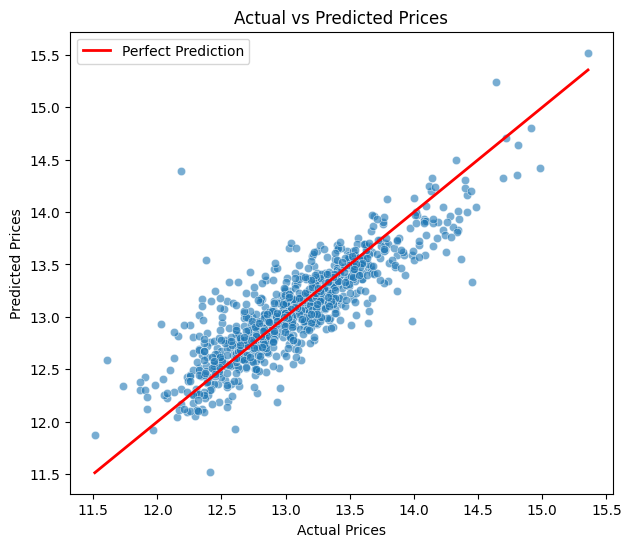

In [10]:
# visualize model performance
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


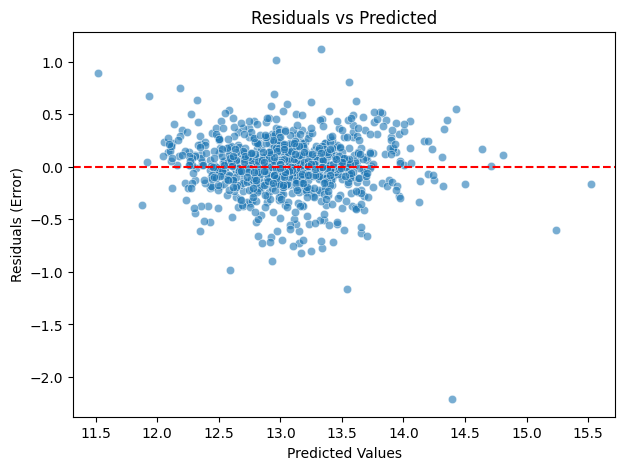

In [11]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()

In [12]:
# check feature importance (coefficients)
coeffs = pd.DataFrame({
    'Feature': ['bedrooms','bathrooms','floors', 'waterfront','view', 'condition', 'was_renovated', 'age', 'sqft_lot', 'sqft_living','sqft_basement'],
    'Coefficient': regressor.coef_.flatten()[43:],
    'Intercept': regressor.intercept_
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
coeffs

,Feature,Coefficient,Intercept
0,waterfront,0.394174,12.4664
1,sqft_living,0.329159,12.4664
2,view,0.063831,12.4664
3,bathrooms,0.059560,12.4664
4,condition,0.043539,12.4664
5,age,0.042637,12.4664
6,floors,0.030507,12.4664
7,was_renovated,0.012592,12.4664
8,sqft_lot,0.005340,12.4664
9,sqft_basement,-0.045655,12.4664
